<a href="https://colab.research.google.com/github/ryoojunsang/2023S-Ajou-ML/blob/main/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def load_rand():
    X=[]
    dir_path='/content/drive/MyDrive/MACHINE/fruit_images'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for sub_dir2 in tqdm(os.listdir(path_main)):
          path_main2=os.path.join(path_main,sub_dir2)
          i=0
          for img_name in os.listdir(path_main2):
              if i>=6:
                  break
              img=cv2.imread(os.path.join(path_main2,img_name))
              img=cv2.resize(img,(100,100))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
              X.append(img)
              i+=1
    return X

In [3]:
X=load_rand()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten



 50%|█████     | 1/2 [00:13<00:13, 13.73s/it]

fresh



100%|██████████| 2/2 [00:23<00:00, 11.73s/it]


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshwatermelone', 'freshstrawberry', 'freshtomato', 'rottenwatermelone', 'rottenstrawberry', 'rottentomato']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

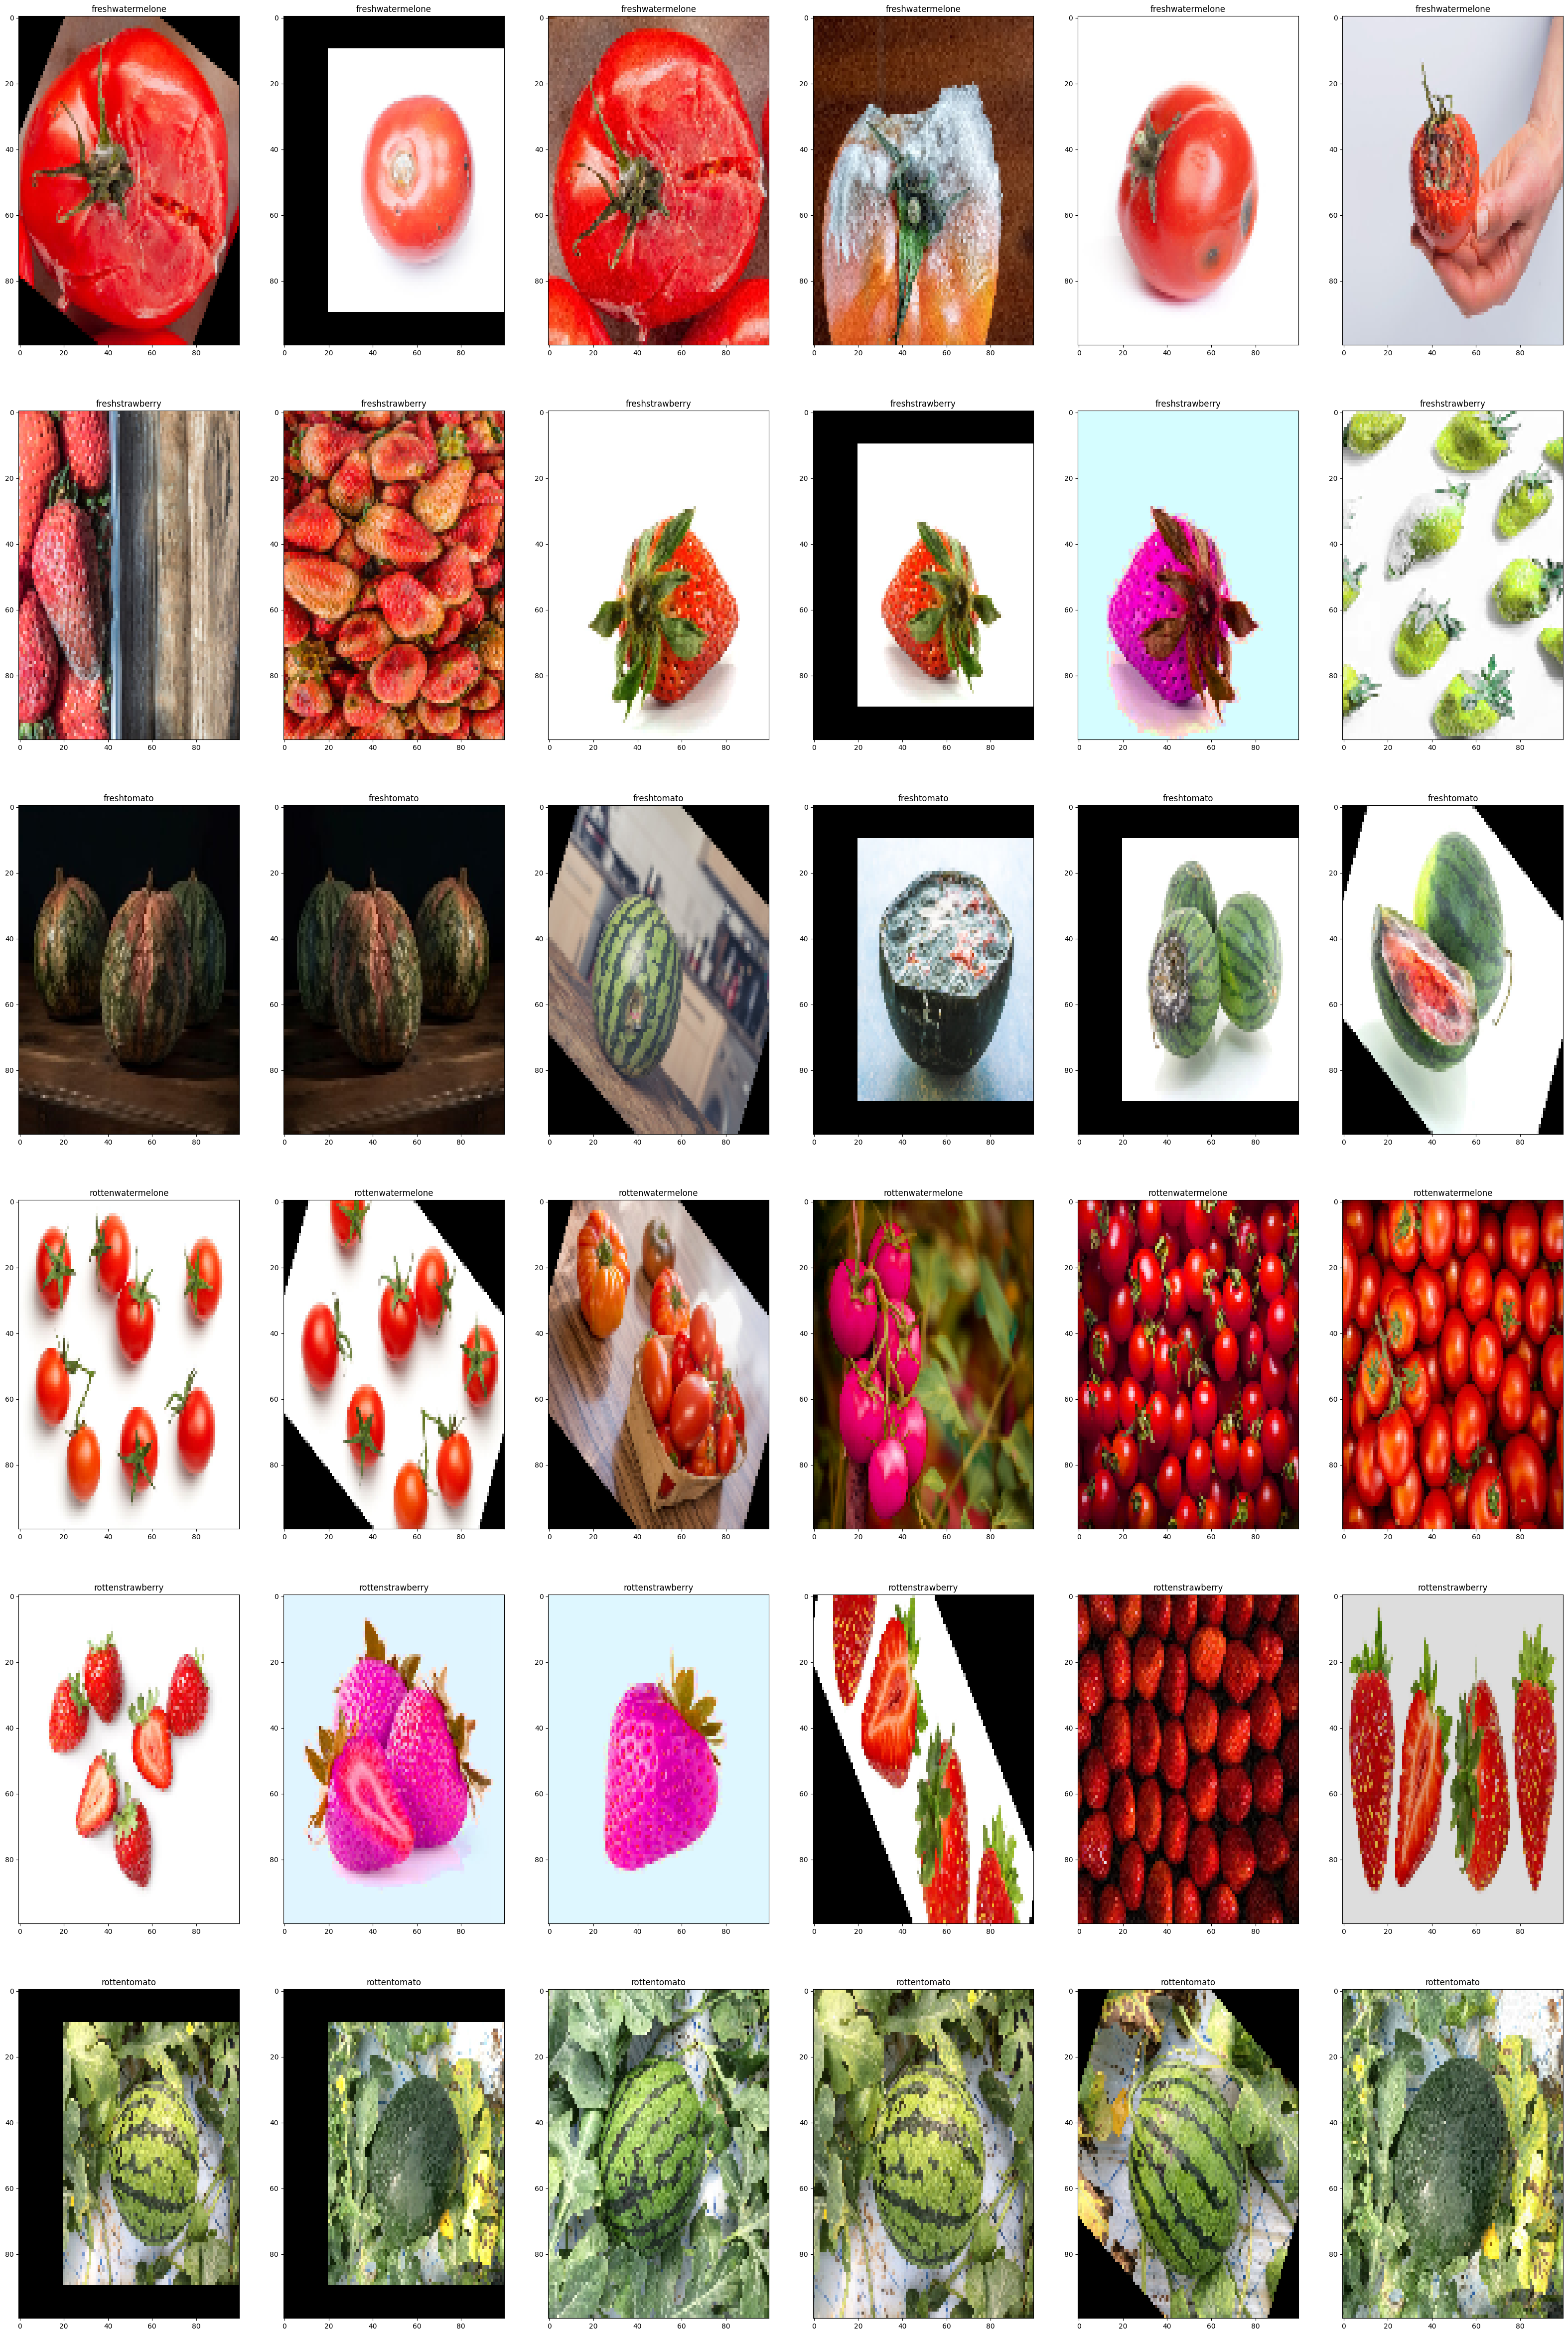

In [6]:
show_subpot(X)

In [7]:
del X

# Rotten vs fresh

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [11]:
X,Y=load_rottenvsfresh()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [00:36<00:36, 36.98s/it]

fresh


100%|██████████| 2/2 [16:05<00:00, 482.93s/it]


Shuffling your data.....


100%|██████████| 5708/5708 [00:00<00:00, 908132.13it/s]


In [12]:
Y=np.array(Y)
X=np.array(X)
print(X)
print(Y)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[165 164 158]
   [169 168 160]
   [170 169 162]
   ...
   [168 166 148]
   [165 163 145]
   [165 163 145]]

  [[165 164 157]
   [168 167 160]
   [171 169 166]
   ...
   [170 169 151]
   [168 166 148]
   [167 165 147]]

  [[165 164 157]
   [169 168 161]
   [169 168 161]
   ...
   [169 168 151]
   [168 166 148]
   [164 162

In [13]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    2966
1    2742
dtype: int64

In [14]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [15]:
X_val,Y_val=load_rottenvsfresh_valset()

  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [08:44<08:44, 524.28s/it]

fresh


100%|██████████| 2/2 [28:49<00:00, 864.56s/it]


Shuffling your data.....


100%|██████████| 5708/5708 [00:00<00:00, 908442.26it/s]


In [16]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    2966
1    2742
dtype: int64

In [17]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

X, Y = load_rottenvsfresh()
X = np.array(X)
Y = np.array(Y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
datagen.fit(X_train)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

base_model.trainable = False

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=20, validation_data=(X_test, Y_test))

loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)



  0%|          | 0/2 [00:00<?, ?it/s]

rotten


 50%|█████     | 1/2 [08:19<08:19, 499.16s/it]

fresh


100%|██████████| 2/2 [27:40<00:00, 830.49s/it]


Shuffling your data.....


100%|██████████| 5708/5708 [00:00<00:00, 1440152.02it/s]


58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
143/143 [==============================] - 718s 5s/step - loss: 0.4879 - accuracy: 0.7849 - val_loss: 0.3275 - val_accuracy: 0.8538
Epoch 2/20
143/143 [==============================] - 697s 5s/step - loss: 0.3243 - accuracy: 0.8603 - val_loss: 0.2781 - val_accuracy: 0.8669
Epoch 3/20
143/143 [==============================] - 697s 5s/step - loss: 0.2940 - accuracy: 0.8771 - val_loss: 0.2517 - val_accuracy: 0.8827
Epoch 4/20
143/143 [==============================] - 686s 5s/step - loss: 0.2565 - accuracy: 0.8925 - val_loss: 0.2158 - val_accuracy: 0.9063
Epoch 5/20
143/143 [==============================] - 704s 5s/step - loss: 0.2459 - accuracy: 0.8894 - val_loss: 0.2273 - val_accuracy: 0.8975
Epoch 6/20
143/143 [==============================] - 693s 5s/step - loss: 0.2289 - accuracy: 0.9047 - val_loss: 0.1939 - val_accuracy: 0.9186
Epoch 7/20
143/143 [==============================] - 689s 5s/step - loss: 0.2205 - accuracy: 0.9058 - val_loss: 0.1862 - val_accuracy: 0.9256

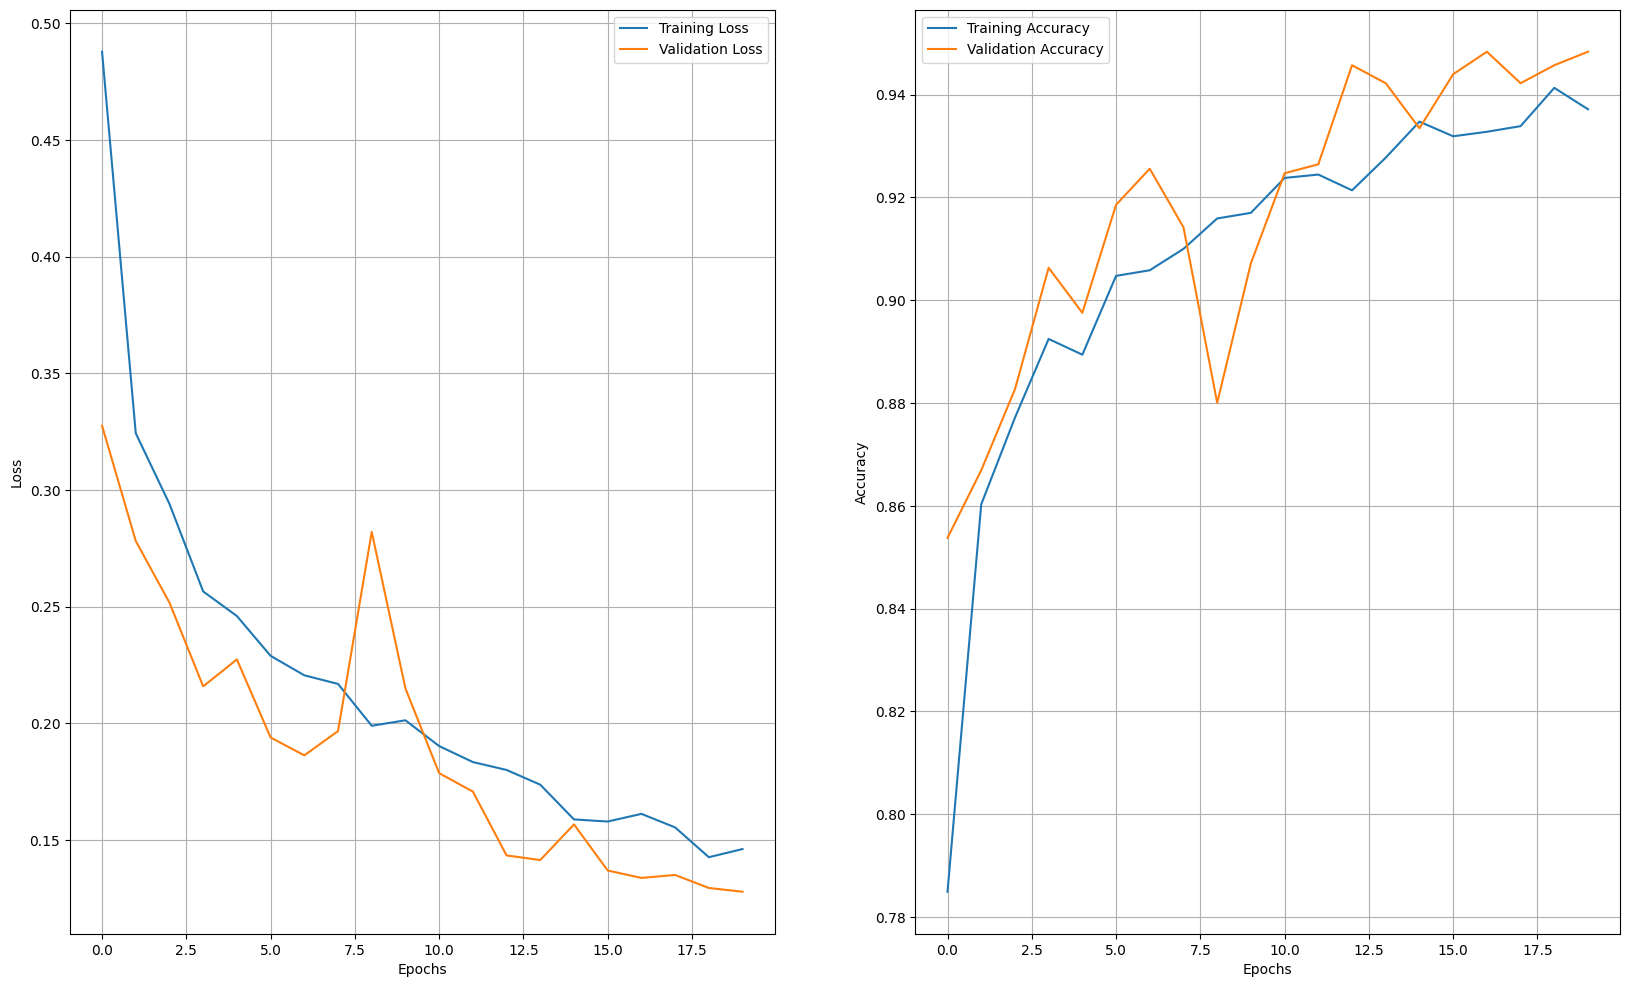

In [18]:
# Loss 그래프
plt.figure(1, figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid(True)
plt.legend()